In [1]:
# Making some essential imports as Usual
import os
import sys
import numpy as np
import re
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
'''
# Replace 'your_folder_path' with the actual path to your image folder
folder_path = '/content/drive/MyDrive/T5_Python/building_classification/train'



# Loop through all files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith("_mask.png"):
        file_path = os.path.join(folder_path, filename)

        # Load the image
        image = cv2.imread(file_path)

        # Check if the image was loaded successfully
        if image is not None:
            # Display the loaded image

            plt.figure(figsize=(8, 4))
            plt.subplot(1, 2, 1)
            plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            plt.title("Original Image")
            plt.axis('off')

            # Check if any pixel is equal to (0, 255, 255) and set it to white (255, 255, 255)
            mask = (image == [255,255,0]).all(axis=-1)

            # Set pixels with value (0, 255, 255) to white (255, 255, 255) and the rest to black (0, 0, 0)
            image[mask] = [255, 255, 255]
            image[~mask] = [0, 0, 0]

            cv2.imwrite(file_path, image)

            # Display the altered image

            plt.subplot(1, 2, 2)
            plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            plt.title("Altered Image")
            plt.axis('off')

            plt.show()

            #print(f"Processed: {filename}")

        else:
            print(f"Failed to load image: {filename}")

print("Processing complete.")
'''

'\n# Replace \'your_folder_path\' with the actual path to your image folder\nfolder_path = \'/content/drive/MyDrive/T5_Python/building_classification/train\'\n\n\n\n# Loop through all files in the folder\nfor filename in os.listdir(folder_path):\n    if filename.endswith("_mask.png"):\n        file_path = os.path.join(folder_path, filename)\n\n        # Load the image\n        image = cv2.imread(file_path)\n\n        # Check if the image was loaded successfully\n        if image is not None:\n            # Display the loaded image\n\n            plt.figure(figsize=(8, 4))\n            plt.subplot(1, 2, 1)\n            plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))\n            plt.title("Original Image")\n            plt.axis(\'off\')\n\n            # Check if any pixel is equal to (0, 255, 255) and set it to white (255, 255, 255)\n            mask = (image == [255,255,0]).all(axis=-1)\n\n            # Set pixels with value (0, 255, 255) to white (255, 255, 255) and the rest to bla

In [ ]:
'''
import os
import cv2
folder_path = '/content/drive/MyDrive/T5_Python/building_classification/train'
def remove_images_with_zero_sum(folder_path):
    for filename in os.listdir(folder_path):
        if filename.endswith("_mask.png"):  # You can adjust the file extension as needed
            file_path = os.path.join(folder_path, filename)

            # Load the image
            image = cv2.imread(file_path)

            # Check if the image was loaded successfully
            if image is not None:
                # Calculate the sum of pixel values
                pixel_sum = image.sum()

                # Check if the pixel sum is zero
                if pixel_sum == 0:
                    # Remove the image file
                    os.remove(file_path)
                    print(f"Removed: {filename}")
                else:
                    print(f"Image '{filename}' has a pixel sum of {pixel_sum}. It will not be removed.")
            else:
                print(f"Failed to load image: {filename}")

    print("Processing complete.")

# Call the function with the folder path
  # Replace with your actual folder path
remove_images_with_zero_sum(folder_path)
'''

'\nimport os\nimport cv2\nfolder_path = \'/content/drive/MyDrive/T5_Python/building_classification/train\'\ndef remove_images_with_zero_sum(folder_path):\n    for filename in os.listdir(folder_path):\n        if filename.endswith("_mask.png"):  # You can adjust the file extension as needed\n            file_path = os.path.join(folder_path, filename)\n\n            # Load the image\n            image = cv2.imread(file_path)\n\n            # Check if the image was loaded successfully\n            if image is not None:\n                # Calculate the sum of pixel values\n                pixel_sum = image.sum()\n\n                # Check if the pixel sum is zero\n                if pixel_sum == 0:\n                    # Remove the image file\n                    os.remove(file_path)\n                    print(f"Removed: {filename}")\n                else:\n                    print(f"Image \'{filename}\' has a pixel sum of {pixel_sum}. It will not be removed.")\n            else:\n       

In [3]:

# defining function for dataLoading function
framObjTrain = {'img' : [],
           'mask' : []
          }

def LoadData( frameObj = None, imgPath = None, maskPath = None, shape = 256):
    imgNames = os.listdir(imgPath)
    maskNames = []

    ## generating mask names
    for mem in imgNames:
        mem = mem.split('_')[0]
        if mem not in maskNames:
            maskNames.append(mem)

    imgAddr = imgPath + '/'
    maskAddr = maskPath + '/'

    for i in range (len(imgNames)):
        try:
            img = plt.imread(imgAddr + maskNames[i] + '_sat.png')
            mask = plt.imread(maskAddr + maskNames[i] + '_mask.png')

        except:
            continue
        img = cv2.resize(img, (shape, shape))
        mask = cv2.resize(mask, (shape, shape))
        frameObj['img'].append(img)
        frameObj['mask'].append(mask[:,:,0]) # this is because its a binary mask and img is present in channel 0

    return frameObj


In [ ]:
'''
folder_path = '/content/drive/MyDrive/T5_Python/Satellite analysis capstone/building_detection/png/train_labels'  # Replace with the path to your folder

for filename in os.listdir(folder_path):
    if filename.endswith('_15.png'):
        old_path = os.path.join(folder_path, filename)
        new_filename = filename.replace('_15.png', '_mask.png')
        new_path = os.path.join(folder_path, new_filename)

        os.rename(old_path, new_path)

print("File names changed successfully.")

'''

'\nfolder_path = \'/content/drive/MyDrive/T5_Python/Satellite analysis capstone/building_detection/png/train_labels\'  # Replace with the path to your folder\n\nfor filename in os.listdir(folder_path):\n    if filename.endswith(\'_15.png\'):\n        old_path = os.path.join(folder_path, filename)\n        new_filename = filename.replace(\'_15.png\', \'_mask.png\')\n        new_path = os.path.join(folder_path, new_filename)\n\n        os.rename(old_path, new_path)\n\nprint("File names changed successfully.")\n\n'

In [ ]:
'''
folder_path = '/content/drive/MyDrive/T5_Python/Satellite analysis capstone/building_detection/png/train'  # Replace with the path to your folder

for filename in os.listdir(folder_path):
    if filename.endswith('_15.png'):
        old_path = os.path.join(folder_path, filename)
        new_filename = filename.replace('_15.png', '_sat.png')
        new_path = os.path.join(folder_path, new_filename)

        os.rename(old_path, new_path)

print("File names changed successfully.")

'''

'\nfolder_path = \'/content/drive/MyDrive/T5_Python/Satellite analysis capstone/building_detection/png/train\'  # Replace with the path to your folder\n\nfor filename in os.listdir(folder_path):\n    if filename.endswith(\'_15.png\'):\n        old_path = os.path.join(folder_path, filename)\n        new_filename = filename.replace(\'_15.png\', \'_sat.png\')\n        new_path = os.path.join(folder_path, new_filename)\n\n        os.rename(old_path, new_path)\n\nprint("File names changed successfully.")\n\n'

In [ ]:
'''
import shutil

source_folder = '/content/drive/MyDrive/T5_Python/Satellite analysis capstone/building_detection/png/train_labels'  # Replace with the path to your source folder
destination_folder = '/content/drive/MyDrive/T5_Python/Satellite analysis capstone/building_detection/png/train'  # Replace with the path to your destination folder

# Create the destination folder if it doesn't exist
if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

# Iterate through all files in the source folder and move them to the destination folder
for filename in os.listdir(source_folder):
    source_path = os.path.join(source_folder, filename)
    destination_path = os.path.join(destination_folder, filename)

    shutil.move(source_path, destination_path)

print("Files moved successfully.")

'''

'\nimport shutil\n\nsource_folder = \'/content/drive/MyDrive/T5_Python/Satellite analysis capstone/building_detection/png/train_labels\'  # Replace with the path to your source folder\ndestination_folder = \'/content/drive/MyDrive/T5_Python/Satellite analysis capstone/building_detection/png/train\'  # Replace with the path to your destination folder\n\n# Create the destination folder if it doesn\'t exist\nif not os.path.exists(destination_folder):\n    os.makedirs(destination_folder)\n\n# Iterate through all files in the source folder and move them to the destination folder\nfor filename in os.listdir(source_folder):\n    source_path = os.path.join(source_folder, filename)\n    destination_path = os.path.join(destination_folder, filename)\n\n    shutil.move(source_path, destination_path)\n\nprint("Files moved successfully.")\n\n'

In [4]:
# defining Conv2d block for our u-net
# this block essentially performs 2 convolution

def Conv2dBlock(inputTensor, numFilters, kernelSize = 3, doBatchNorm = True):
    #first Conv
    x = tf.keras.layers.Conv2D(filters = numFilters, kernel_size = (kernelSize, kernelSize),
                              kernel_initializer = 'he_normal', padding = 'same') (inputTensor)

    if doBatchNorm:
        x = tf.keras.layers.BatchNormalization()(x)

    x =tf.keras.layers.Activation('relu')(x)

    #Second Conv
    x = tf.keras.layers.Conv2D(filters = numFilters, kernel_size = (kernelSize, kernelSize),
                              kernel_initializer = 'he_normal', padding = 'same') (x)
    if doBatchNorm:
        x = tf.keras.layers.BatchNormalization()(x)

    x = tf.keras.layers.Activation('relu')(x)

    return x



# Now defining Unet
def Unet(inputImage, numFilters = 16, droupouts = 0.1, doBatchNorm = True):
    # defining encoder Path

    c1 = Conv2dBlock(inputImage, numFilters * 1, kernelSize = 3, doBatchNorm = doBatchNorm)
    p1 = tf.keras.layers.MaxPooling2D((2,2))(c1)
    p1 = tf.keras.layers.Dropout(droupouts)(p1)

    c2 = Conv2dBlock(p1, numFilters * 1, kernelSize = 3, doBatchNorm = doBatchNorm)
    p2 = tf.keras.layers.MaxPooling2D((2,2))(c2)
    p2 = tf.keras.layers.Dropout(droupouts)(p2)

    c3 = Conv2dBlock(p2, numFilters * 2, kernelSize = 3, doBatchNorm = doBatchNorm)
    p3 = tf.keras.layers.MaxPooling2D((2,2))(c3)
    p3 = tf.keras.layers.Dropout(droupouts)(p3)

    c4 = Conv2dBlock(p3, numFilters * 4, kernelSize = 3, doBatchNorm = doBatchNorm)
    p4 = tf.keras.layers.MaxPooling2D((2,2))(c4)
    p4 = tf.keras.layers.Dropout(droupouts)(p4)

    c5 = Conv2dBlock(p4, numFilters * 8, kernelSize = 3, doBatchNorm = doBatchNorm)
    p5 = tf.keras.layers.MaxPooling2D((2,2))(c5)
    p5 = tf.keras.layers.Dropout(droupouts)(p5)

    c6 = Conv2dBlock(p5, numFilters * 16, kernelSize = 3, doBatchNorm = doBatchNorm)

    # defining decoder path
    u7 = tf.keras.layers.Conv2DTranspose(numFilters*16, (3, 3), strides = (2, 2), padding = 'same')(c6)
    u7 = tf.keras.layers.concatenate([u7, c5])
    u7 = tf.keras.layers.Dropout(droupouts)(u7)
    c7 = Conv2dBlock(u7, numFilters * 16, kernelSize = 3, doBatchNorm = doBatchNorm)

    u8 = tf.keras.layers.Conv2DTranspose(numFilters*8, (3, 3), strides = (2, 2), padding = 'same')(c7)
    u8 = tf.keras.layers.concatenate([u8, c4])
    u8 = tf.keras.layers.Dropout(droupouts)(u8)
    c8 = Conv2dBlock(u8, numFilters * 8, kernelSize = 3, doBatchNorm = doBatchNorm)

    u9 = tf.keras.layers.Conv2DTranspose(numFilters*4, (3, 3), strides = (2, 2), padding = 'same')(c8)
    u9 = tf.keras.layers.concatenate([u9, c3])
    u9 = tf.keras.layers.Dropout(droupouts)(u9)
    c9 = Conv2dBlock(u9, numFilters * 4, kernelSize = 3, doBatchNorm = doBatchNorm)

    u10 = tf.keras.layers.Conv2DTranspose(numFilters*1, (3, 3), strides = (2, 2), padding = 'same')(c9)
    u10 = tf.keras.layers.concatenate([u10, c2])
    u10 = tf.keras.layers.Dropout(droupouts)(u10)
    c10 = Conv2dBlock(u10, numFilters * 2, kernelSize = 3, doBatchNorm = doBatchNorm)

    u11 = tf.keras.layers.Conv2DTranspose(numFilters*1, (3, 3), strides = (2, 2), padding = 'same')(c10)
    u11 = tf.keras.layers.concatenate([u11, c1])
    u11 = tf.keras.layers.Dropout(droupouts)(u11)
    c11 = Conv2dBlock(u11, numFilters * 1, kernelSize = 3, doBatchNorm = doBatchNorm)

    output = tf.keras.layers.Conv2D(1, (1, 1), activation = 'sigmoid')(c11)
    model = tf.keras.Model(inputs = [inputImage], outputs = [output])
    return model


In [5]:
## instanctiating model
inputs = tf.keras.layers.Input((256, 256, 3))
unet = Unet(inputs, droupouts= 0.03)
unet.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'] )

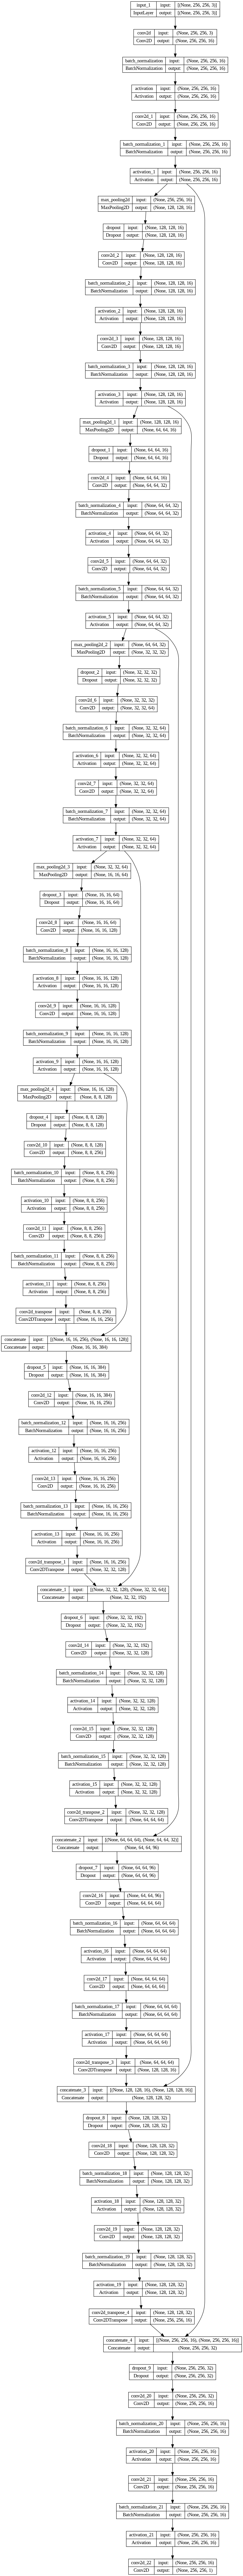

In [6]:
from tensorflow.keras.utils import plot_model
plot_model(unet, to_file='UnetArchitecture.png', show_shapes=True, show_layer_names=True)

In [ ]:
import os
import numpy as np
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the paths to your original and augmented image folders
original_folder = '/content/drive/MyDrive/T5_Python/Satellite analysis capstone/building_detection/png/train'
augmented_folder = '/content/drive/MyDrive/T5_Python/Satellite analysis capstone/building_detection/png/aug_train'

# Create the augmented folder if it doesn't exist
if not os.path.exists(augmented_folder):
    os.makedirs(augmented_folder)

# Create an ImageDataGenerator for augmentation with only horizontal flip
datagen = ImageDataGenerator(
    horizontal_flip=True
)

# Iterate through the original images
for filename in os.listdir(original_folder):
    image_path = os.path.join(original_folder, filename)

    # Load the image
    img = Image.open(image_path)
    img_array = np.array(img)
    img_array = img_array.reshape((1,) + img_array.shape)  # Add batch dimension

    # Determine the file format based on the original file name
    if filename.endswith('_mask.png'):
        save_format = '_mask.png'
    elif filename.endswith('_sat.png'):
        save_format = '_sat.png'
    else:
        save_format = 'png'  # Default format if not ending in '_mask.png' or '_sat.png'

    # Generate augmented images
    num_augmented_images = 5  # Adjust as needed
    for i, batch in enumerate(datagen.flow(img_array, batch_size=1, save_to_dir=augmented_folder, save_prefix='', save_format=save_format)):
        if i == num_augmented_images - 1:
            break  # Break the loop after generating the desired number of augmented images

print("Data augmentation (horizontal flip) complete.")


In [ ]:
framObjTrain = LoadData(
    framObjTrain, imgPath = '/content/drive/MyDrive/T5_Python/Satellite analysis capstone/building_detection/png/train',
    maskPath = '/content/drive/MyDrive/T5_Python/Satellite analysis capstone/building_detection/png/train'
    , shape = 256)




In [ ]:
print(len(framObjTrain['img']))
print(len(framObjTrain['mask']))

137
137


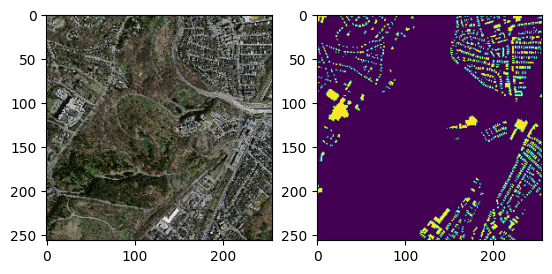

In [ ]:
## displaying data loaded by our function
plt.subplot(1,2,1)
plt.imshow(framObjTrain['img'][1])
plt.subplot(1,2,2)
plt.imshow(framObjTrain['mask'][1])
plt.show()


In [ ]:
retVal = unet.fit(np.array(framObjTrain['img']), np.array(framObjTrain['mask']), epochs = 200, verbose = 1)

Epoch 1/200
5/5 [==============================] - 35s 476ms/step - loss: 0.5544 - accuracy: 0.7277
Epoch 2/200
5/5 [==============================] - 1s 159ms/step - loss: 0.4926 - accuracy: 0.7905
Epoch 3/200
5/5 [==============================] - 1s 133ms/step - loss: 0.4553 - accuracy: 0.8140
Epoch 4/200
5/5 [==============================] - 1s 160ms/step - loss: 0.4289 - accuracy: 0.8264
Epoch 5/200
5/5 [==============================] - 1s 150ms/step - loss: 0.4087 - accuracy: 0.8390
Epoch 6/200
5/5 [==============================] - 1s 156ms/step - loss: 0.3919 - accuracy: 0.8443
Epoch 7/200
5/5 [==============================] - 1s 159ms/step - loss: 0.3768 - accuracy: 0.8478
Epoch 8/200
5/5 [==============================] - 1s 173ms/step - loss: 0.3636 - accuracy: 0.8501
Epoch 9/200
5/5 [==============================] - 1s 164ms/step - loss: 0.3536 - accuracy: 0.8501
Epoch 10/200
5/5 [==============================] - 1s 158ms/step - loss: 0.3441 - accuracy: 0.8526
Epoch 11

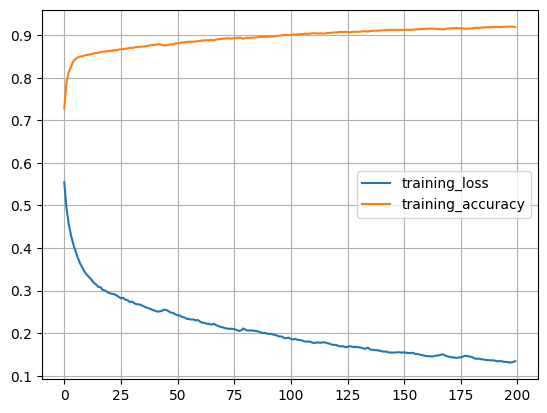

In [ ]:
plt.plot(retVal.history['loss'], label = 'training_loss')
plt.plot(retVal.history['accuracy'], label = 'training_accuracy')
plt.legend()
plt.grid(True)

In [ ]:
def predict16 (valMap, model, shape = 256):
    ## getting and proccessing val data
    img = valMap['img'][0:136]
    mask = valMap['mask'][0:136]
    #mask = mask[0:16]

    imgProc = img[0:136]
    imgProc = np.array(img)

    predictions = model.predict(imgProc)


    return predictions, imgProc, mask


def Plotter(img, predMask, groundTruth):
    plt.figure(figsize=(12,12))

    plt.subplot(1,3,1)
    plt.imshow(img)
    plt.title('Aerial image')

    plt.subplot(1,3,2)
    plt.imshow(predMask)
    plt.title('Predicted Routes')

    plt.subplot(1,3,3)
    plt.imshow(groundTruth)
    plt.title('Actual Routes')



In [ ]:
sixteenPrediction, actuals, masks = predict16(framObjTrain, unet)

5/5 [==============================] - 1s 143ms/step


In [ ]:
import random

# Generate 10 random numbers between 1 and 9000
random_numbers = [random.randint(1, 137) for _ in range(10)]

for i in random_numbers:
  Plotter(actuals[i], sixteenPrediction[i][:,:,0], masks[i])

Output hidden; open in https://colab.research.google.com to view.

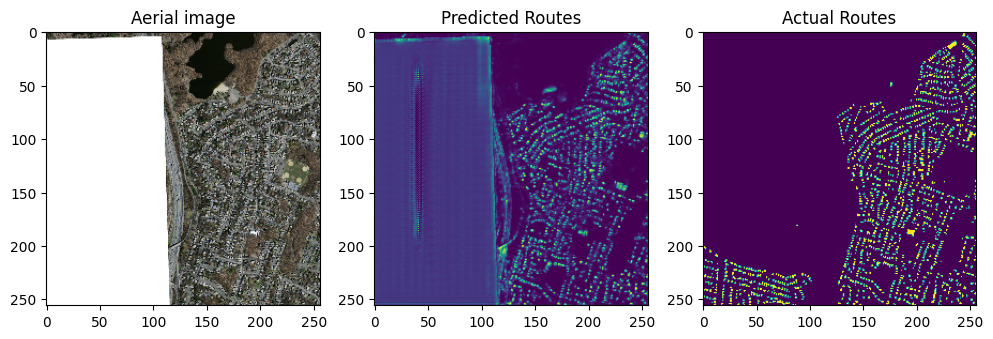

In [ ]:
Plotter(actuals[2], sixteenPrediction[2][:,:,0], masks[2])

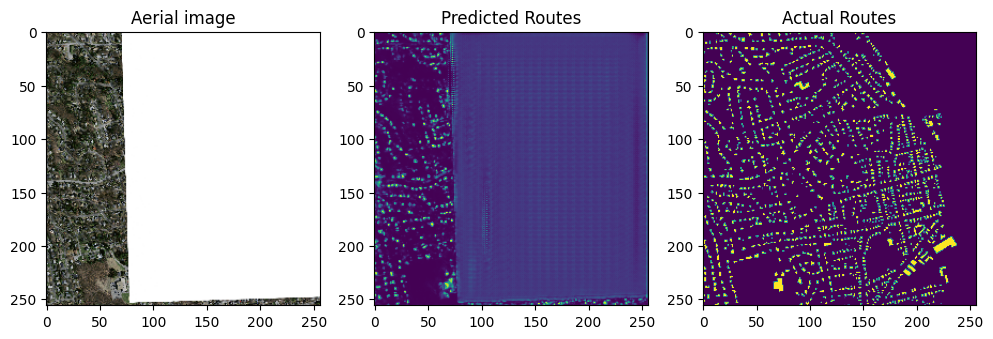

In [ ]:
Plotter(actuals[3], sixteenPrediction[3][:,:,0], masks[3])

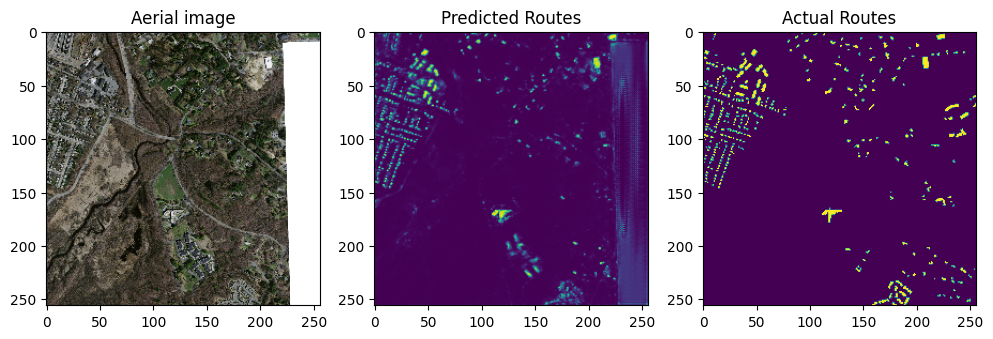

In [ ]:
Plotter(actuals[5], sixteenPrediction[5][:,:,0], masks[5])

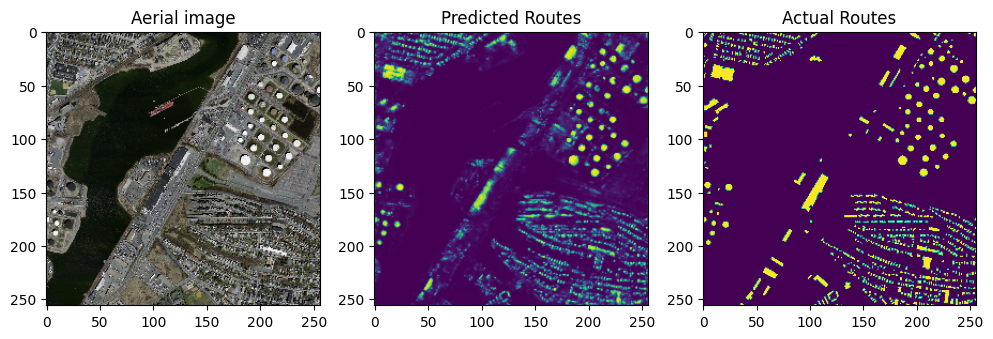

In [ ]:
Plotter(actuals[27], sixteenPrediction[27][:,:,0], masks[27])

In [ ]:
unet.save('BuldingDetector.h5')

In [ ]:
import tensorflow as tf
from PIL import Image
import numpy as np

# Replace 'path/to/your/model' with the actual path to your saved model
model_path = 'BuldingDetector.h5'

# Load the saved model
model = tf.keras.models.load_model(model_path)

# Replace 'path/to/your/test/images' with the actual path to your test images
test_images_folder = '/content/drive/MyDrive/T5_Python/Satellite analysis capstone/building_detection/png/test'

# Iterate through test images
for filename in os.listdir(test_images_folder):
    image_path = os.path.join(test_images_folder, filename)

    # Load and preprocess the image
    img = Image.open(image_path)
    img = img.resize((256, 256))  # Replace with your model's input size
    img_array = np.array(img) / 255.0  # Normalize pixel values

    # Expand dimensions to match the model's expected input shape
    img_array = np.expand_dims(img_array, axis=0)

    # Make predictions
    predictions = model.predict(img_array)


    # Post-process the predictions as needed for your specific model and task
    # For example, you might threshold the predicted mask to create a binary mask

    # Display or save the original image and segmentation result for visualization
    # Replace 'path/to/save/segmentation/results' with the path to save the segmentation results
    result_path = os.path.join('/content/drive/MyDrive/T5_Python/Satellite analysis capstone/building_detection/png/test', f"{filename}_result.png")
    print(predictions[0].shape, predictions[0].dtype)

predictions_image_array = (predictions[0] * 255).astype(np.uint8)

# Create an image from the array
predictions_image = Image.fromarray(predictions_image_array.reshape(256, 256))

# Save or display the image
predictions_image.save(result_path)

print("Segmentation testing complete.")


In [ ]:
import tensorflow as tf
from PIL import Image
import numpy as np
import os

# Replace 'BuldingDetector.h5' with the actual path to your saved model
model_path = 'BuldingDetector.h5'

# Load the saved model
model = tf.keras.models.load_model(model_path)

# Replace '/content/drive/MyDrive/T5_Python/Satellite analysis capstone/building_detection/png/test'
# with the actual path to your test images
test_images_folder = '/content/drive/MyDrive/T5_Python/Satellite analysis capstone/building_detection/png/test'

# Initialize variables for accuracy calculation
total_samples = 0
correct_predictions = 0

# Iterate through test images
for filename in os.listdir(test_images_folder):
    image_path = os.path.join(test_images_folder, filename)

    # Load and preprocess the image
    img = Image.open(image_path)
    img = img.resize((256, 256))  # Replace with your model's input size
    img_array = np.array(img) / 255.0  # Normalize pixel values

    # Expand dimensions to match the model's expected input shape
    img_array = np.expand_dims(img_array, axis=0)

    # Make predictions
    predictions = model.predict(img_array)

    # Assuming you have ground truth labels (masks) for your test images
    # Replace 'path/to/ground/truth' with the actual path to your ground truth masks
    ground_truth_path = '/content/drive/MyDrive/T5_Python/Satellite analysis capstone/building_detection/png/test_labels'
    ground_truth = np.array(Image.open(ground_truth_path)) / 255.0  # Normalize pixel values

    # Compare predicted mask with ground truth mask
    correct_predictions += np.sum(np.round(predictions[0]) == ground_truth)
    total_samples += ground_truth.size

# Calculate accuracy
accuracy = correct_predictions / total_samples
print(f"Accuracy: {accuracy * 100:.2f}%")
